In [75]:
import numpy as np
import  pandas as pd
import matplotlib.pyplot as plt
from  cooler_extended import  CoolerExtended

In [76]:
filepath = 'data/Rao2014-IMR90-MboI-allreps-filtered.500kb.cool'
bases_in_bin = 500000 #for resolution 500kb - 500000
chr_number = "1" #number of interested chromosome or "X"
c = CoolerExtended(filepath)
sv_master_table = pd.read_csv("result.csv",delimiter = "\t")

D:\Study\scientific\cooler_extended.py:12: RuntimeWarning: Mean of empty slice
  averages_at_dist = [np.nanmean(distribution_at_dist(arr, d)) for d in range(0, n)]
D:\Study\scientific\cooler_extended.py:16: RuntimeWarning: invalid value encountered in double_scalars
  ans[i, j] = arr[i, j] / averages_at_dist[abs(i - j)]


In [77]:
#getting normilized hiс matrix by chromosome
matrix = c.hic_matrices_normalized["chr"+chr_number]
#getting SVs
sv_for_chr = sv_master_table[sv_master_table["chrom1"]==chr_number][sv_master_table["chrom2"]==chr_number]
sv_bins_x = []
sv_bins_y = []
for i in sv_for_chr["start1"].tolist():
        sv_bins_x.append(i//bases_in_bin)
for i in sv_for_chr["start2"].tolist():
        sv_bins_y.append(i//bases_in_bin)

C:\Users\vit\AppData\Local\Temp/ipykernel_6000/2471566942.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sv_for_chr = sv_master_table[sv_master_table["chrom1"]==chr_number][sv_master_table["chrom2"]==chr_number]


C:\Users\vit\AppData\Local\Temp/ipykernel_6000/2963839738.py:3: RuntimeWarning: divide by zero encountered in log10
  im = ax.matshow(np.log10(matrix), cmap='YlOrRd')


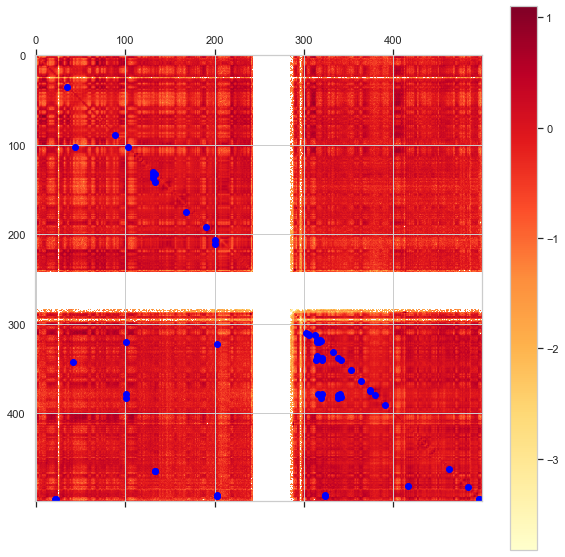

In [78]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
im = ax.matshow(np.log10(matrix), cmap='YlOrRd')
fig.colorbar(im)
plt.scatter(sv_bins_x,sv_bins_y,c="blue")
plt.show()

In [79]:
sv_hic_score = []
for i in range(sv_bins_x.__len__()):
        sv_hic_score.append(matrix[sv_bins_x[i]][sv_bins_y[i]])

chr_hic_score = []
chr_for_hic = sv_master_table[sv_master_table["chrom1"]==chr_number][sv_master_table["chrom2"]==chr_number][sv_master_table["chromo_label1"]!="No"]
chr_bins_x = []
chr_bins_y = []
for i in chr_for_hic["start1"].tolist():
        chr_bins_x.append(i//bases_in_bin)
for i in chr_for_hic["start2"].tolist():
        chr_bins_y.append(i//bases_in_bin)
for i in range(chr_bins_x.__len__()):
        chr_hic_score.append(matrix[chr_bins_x[i]][chr_bins_y[i]])

chr_shift_hic_score = []
chr_shift_bins_x = []
chr_shift_bins_y = []
for x in chr_bins_x:
        if x<matrix.shape[0]-10:
                chr_shift_bins_x.append(x+10)
        else:
                chr_shift_bins_x.append(x-10)
for y in chr_bins_y:
        if y<matrix.shape[0]-10:
                chr_shift_bins_y.append(y+10)
        else:
                chr_shift_bins_y.append(y-10)
for i in range(chr_shift_bins_x.__len__()):
        chr_shift_hic_score.append(matrix[chr_shift_bins_x[i]][chr_shift_bins_y[i]])

sv_shift_hic_score = []
sv_shift_bins_x = []
sv_shift_bins_y = []
for x in sv_bins_x:
        if x<matrix.shape[0]-10:
                sv_shift_bins_x.append(x+10)
        else:
                sv_shift_bins_x.append(x-10)
for y in sv_bins_y:
        if y<matrix.shape[0]-10:
                sv_shift_bins_y.append(y+10)
        else:
                sv_shift_bins_y.append(y-10)
for i in range(sv_shift_bins_x.__len__()):
        sv_shift_hic_score.append(matrix[sv_shift_bins_x[i]][sv_shift_bins_y[i]])

C:\Users\vit\AppData\Local\Temp/ipykernel_6000/2181064857.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  chr_for_hic = sv_master_table[sv_master_table["chrom1"]==chr_number][sv_master_table["chrom2"]==chr_number][sv_master_table["chromo_label1"]!="No"]


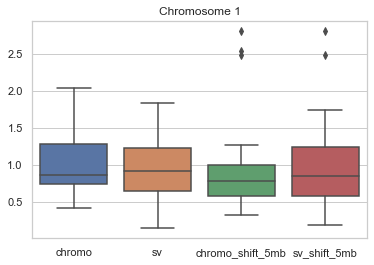

In [80]:
import seaborn as sns

sns.set_theme(style="whitegrid")
arrays = [chr_hic_score, sv_hic_score, chr_shift_hic_score, sv_shift_hic_score]
df = pd.DataFrame(list(zip(chr_hic_score, sv_hic_score, chr_shift_hic_score, sv_shift_hic_score)))
df.columns=['chromo','sv','chromo_shift_5mb','sv_shift_5mb']
ax = sns.boxplot(data=df).set_title("Chromosome "+chr_number)